In [1]:
# Dependencies Used
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from EDA import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [2]:
data = get_training_data()
x = data.drop(columns=["Class"])
y = data["Class"]   

In [3]:
# Trainsplit
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 42)

In [4]:
# Training Models: 
log_reg = LogisticRegression(class_weight= "balanced")
Naiv_Bay = GaussianNB()
log_reg.fit(x_train, y_train)
Naiv_Bay.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


_Confusion Matrix: Logistic Regression
[[71  7]
 [ 3 40]]

_Confusion Matrix: Naive Bayes
[[77  1]
 [ 4 39]]



################################################################################################################################


🔹 AUC Logistic Regression: 0.962
🔹 AUC Naive Bayes: 0.952




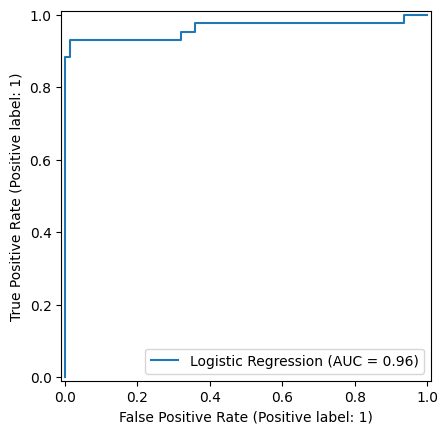

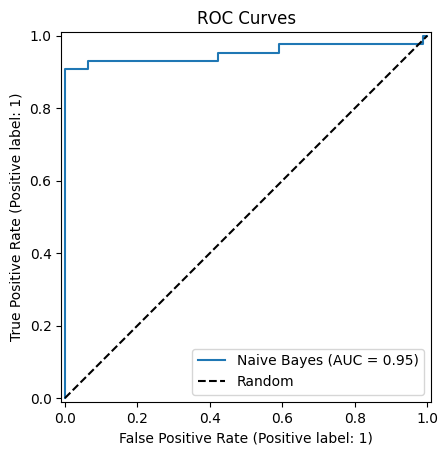




#############################################################################################################################





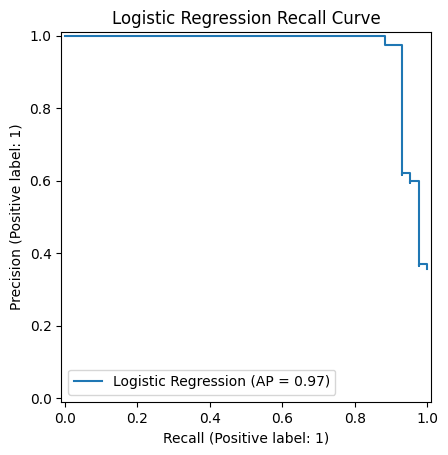

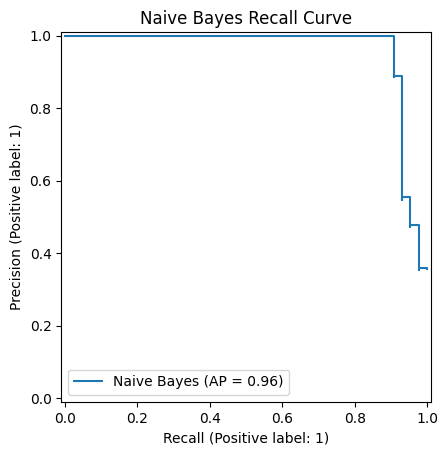

In [5]:
def results(modl_1, modl_2, x_test, y_test):
    # Predictions, let's see how we did: 
    log_pred = modl_1.predict(x_test)
    Naiv_pred = modl_2.predict(x_test)
    print("_Confusion Matrix: Logistic Regression")
    print(f"{confusion_matrix(y_test, log_pred)}\n")

    print("_Confusion Matrix: Naive Bayes")
    print(f"{confusion_matrix(y_test, Naiv_pred)}\n")

    print("\n\n################################################################################################################################\n\n")

    # Probabilities for AUC
    log_probs = log_reg.predict_proba(x_test)[:, 1]
    naiv_probs = Naiv_Bay.predict_proba(x_test)[:, 1]

    # AUC Scores
    log_auc = roc_auc_score(y_test, log_probs)
    naiv_auc = roc_auc_score(y_test, naiv_probs)

    print(f"🔹 AUC Logistic Regression: {log_auc:.3f}")
    print(f"🔹 AUC Naive Bayes: {naiv_auc:.3f}\n\n")


    # Plot ROC Curves
    RocCurveDisplay.from_estimator(log_reg, x_test, y_test, name="Logistic Regression")
    RocCurveDisplay.from_estimator(Naiv_Bay, x_test, y_test, name="Naive Bayes")
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.legend()
    plt.title("ROC Curves")
    plt.show()

    print("\n\n\n#############################################################################################################################\n\n\n")

    PrecisionRecallDisplay.from_estimator(log_reg, x_test, y_test, name="Logistic Regression")
    plt.title("Logistic Regression Recall Curve")
    PrecisionRecallDisplay.from_estimator(Naiv_Bay, x_test, y_test, name="Naive Bayes")
    plt.title("Naive Bayes Recall Curve")
    plt.show()
    



results(log_reg, Naiv_Bay, x_test, y_test)
    

Right so our models seem to perform good with the balanced, clean and hipperey-hop data, but what about thw whole dataset? Will the model perform as good?

In [6]:
x_whole, y_whole = get_all_data()

c:\Users\DELL\Documents\Projects\Python\Fraud_Detection_ML\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 284807.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\DELL\Documents\Projects\Python\Fraud_Detection_ML\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 284807.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\DELL\Documents\Projects\Python\Fraud_Detection_ML\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 284807.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\DELL\Documents\Projects\Python\Fraud_Detection_ML\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may n

_Confusion Matrix: Logistic Regression
[[ 87349 196966]
 [    15    477]]

_Confusion Matrix: Naive Bayes
[[ 29795 254520]
 [     0    492]]



################################################################################################################################


🔹 AUC Logistic Regression: 0.958
🔹 AUC Naive Bayes: 0.938




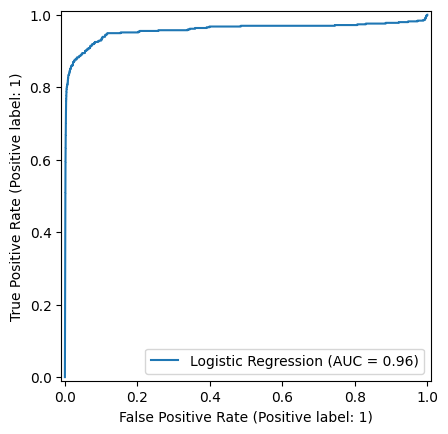

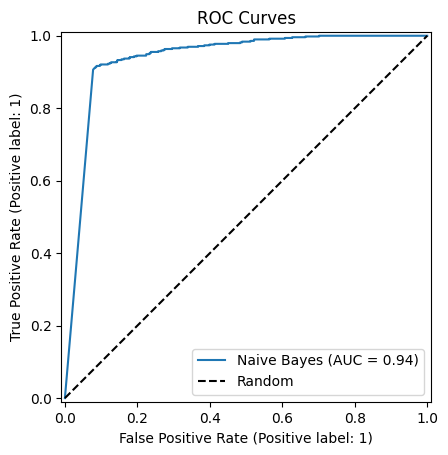




#############################################################################################################################





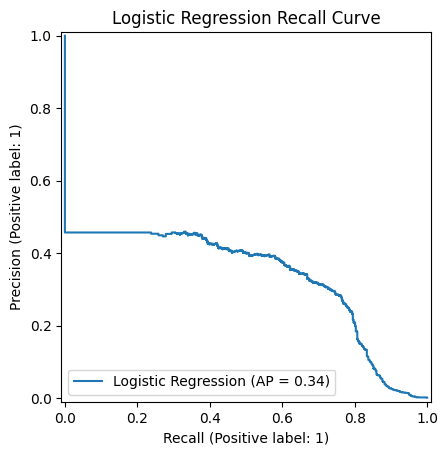

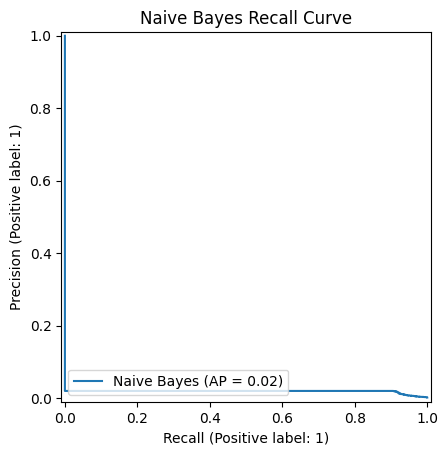

In [7]:
results(log_reg, Naiv_Bay, x_whole, y_whole)

In [8]:
# Let's give it a try with different tresholds: 
def evaluate_threshold(model, x_test, y_test, threshold=0.5):
    probs = model.predict_proba(x_test)[:, 1]
    preds = (probs > threshold).astype(int)
    
    print(f"\nThreshold = {threshold}")
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))


evaluate_threshold(log_reg, x_whole, y_whole, threshold=0.95)
evaluate_threshold(Naiv_Bay, x_whole, y_whole, threshold=0.83)


Threshold = 0.95
[[210832  73483]
 [    21    471]]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85    284315
           1       0.01      0.96      0.01       492

    accuracy                           0.74    284807
   macro avg       0.50      0.85      0.43    284807
weighted avg       1.00      0.74      0.85    284807


Threshold = 0.83
[[ 62081 222234]
 [     0    492]]
              precision    recall  f1-score   support

           0       1.00      0.22      0.36    284315
           1       0.00      1.00      0.00       492

    accuracy                           0.22    284807
   macro avg       0.50      0.61      0.18    284807
weighted avg       1.00      0.22      0.36    284807



Great, so we have now found that a 0.95 threshold for Logistic Regression works just fine: let's then modify our function to plot results that mean something. (Note: Naive Bayes did not perform well enough)

In [9]:
def results(modl_1, modl_2, x_test, y_test, threshold=0.5):
    # --- Probabilities ---
    log_probs = modl_1.predict_proba(x_test)[:, 1]
    naiv_probs = modl_2.predict_proba(x_test)[:, 1]

    # --- Apply custom threshold ---
    log_pred = (log_probs >= threshold).astype(int)
    naiv_pred = (naiv_probs >= threshold).astype(int)

    # --- Confusion Matrices ---
    cm_log = confusion_matrix(y_test, log_pred)
    cm_naiv = confusion_matrix(y_test, naiv_pred)

    def plot_cm(cm, title):
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
                    xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
        plt.title(title)
        plt.ylabel("Actual")
        plt.xlabel("Predicted")
        plt.tight_layout()
        plt.show()

    print(f"Threshold = {threshold:.2f}\n")

    print("_Confusion Matrix: Logistic Regression")
    plot_cm(cm_log, "Logistic Regression Confusion Matrix")
    print(classification_report(y_test, log_pred, digits=3))

    print("_Confusion Matrix: Naive Bayes")
    plot_cm(cm_naiv, "Naive Bayes Confusion Matrix")
    print(classification_report(y_test, naiv_pred, digits=3))

    # --- AUC ---
    log_auc = roc_auc_score(y_test, log_probs)
    naiv_auc = roc_auc_score(y_test, naiv_probs)

    print(f"\n🔹 AUC Logistic Regression: {log_auc:.3f}")
    print(f"🔹 AUC Naive Bayes: {naiv_auc:.3f}")

    # --- ROC Curve ---
    RocCurveDisplay.from_estimator(modl_1, x_test, y_test, name="Logistic Regression")
    RocCurveDisplay.from_estimator(modl_2, x_test, y_test, name="Naive Bayes")
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.title("ROC Curves")
    plt.legend()
    plt.show()

    # --- Precision-Recall ---
    PrecisionRecallDisplay.from_estimator(modl_1, x_test, y_test, name="Logistic Regression")
    plt.title("Precision-Recall: Logistic Regression")
    plt.show()

    PrecisionRecallDisplay.from_estimator(modl_2, x_test, y_test, name="Naive Bayes")
    plt.title("Precision-Recall: Naive Bayes")
    plt.show()

Threshold = 0.95

_Confusion Matrix: Logistic Regression


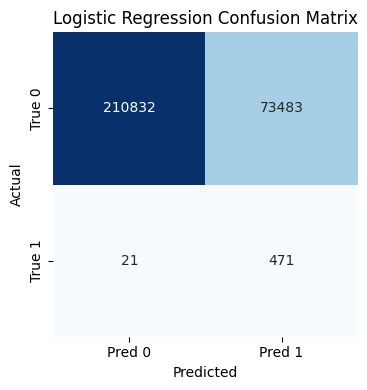

              precision    recall  f1-score   support

           0      1.000     0.742     0.852    284315
           1      0.006     0.957     0.013       492

    accuracy                          0.742    284807
   macro avg      0.503     0.849     0.432    284807
weighted avg      0.998     0.742     0.850    284807

_Confusion Matrix: Naive Bayes


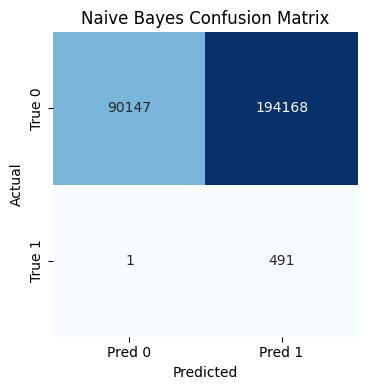

              precision    recall  f1-score   support

           0      1.000     0.317     0.481    284315
           1      0.003     0.998     0.005       492

    accuracy                          0.318    284807
   macro avg      0.501     0.658     0.243    284807
weighted avg      0.998     0.318     0.481    284807


🔹 AUC Logistic Regression: 0.958
🔹 AUC Naive Bayes: 0.938


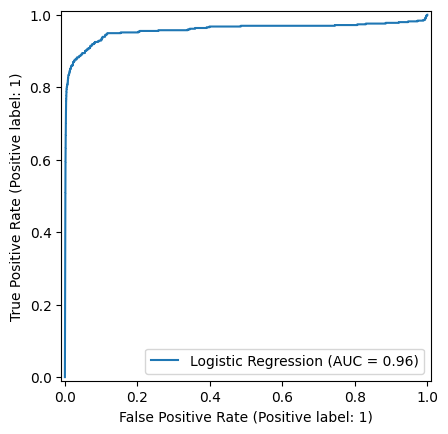

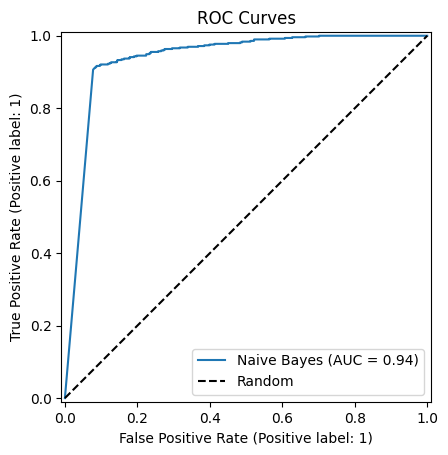

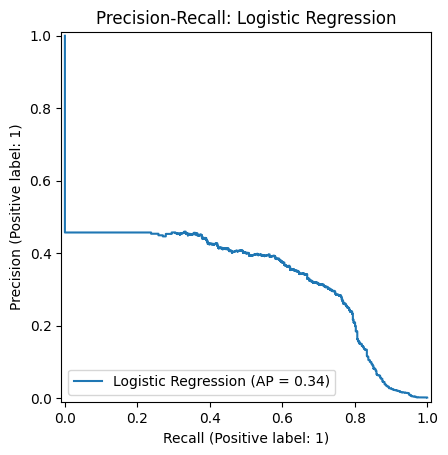

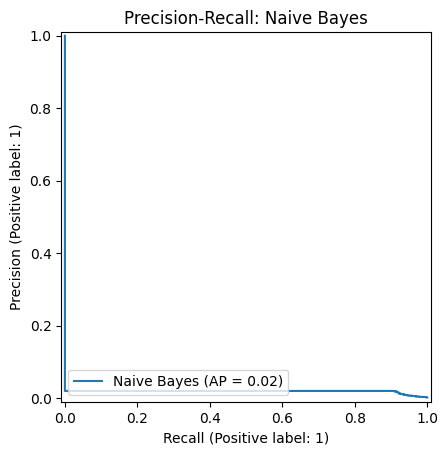

In [10]:
results(log_reg, Naiv_Bay, x_whole, y_whole, threshold=0.95)


Great, so we have now learned that Logistic Regression has learned to identify all fraud cases at the cost of marking many non-fraud as fraud. Thus, a smart approach might be to get all those instances classified as fraud, and take them into a new classifier that will classify those fraud-classified into fraud and non-fraud again. We gonna call this pipeline a second layer. Thus, let's create a pipeline that will do all the work for us!

In [ ]:
def pipeline(threshold=0.9):
    train_data = get_training_data() #Clean hippery-hop data
    test_data_x, test_data_y = get_all_data() #Whole dataset un-cleanned

    # Train first model on balanced data
    first_model = LogisticRegression(class_weight="balanced")
    x_train = train_data.drop(columns="Class")
    y_train = train_data["Class"]
    first_model.fit(x_train, y_train)

    # Predict on the full (imbalanced) dataset
    probs = first_model.predict_proba(test_data_x)[:, 1]
    first_predictions = (probs > threshold).astype(int)

    # Identify suspicious transactions (predicted as fraud)
    suspicious_x = test_data_x[first_predictions == 1]
    suspicious_y = test_data_y[first_predictions == 1]  # True labels of suspicious

    rndm_x_train, rndm_x_test, rndm_y_train, rndm_y_test = train_test_split(
        suspicious_x, suspicious_y, train_size=0.8, random_state=42
    )

    second_model = RandomForestClassifier(n_estimators=20)
    second_model.fit(rndm_x_train, rndm_y_train)

    # Second prediction only on the suspicious set
    second_predictions = second_model.predict(rndm_x_test)

    return {
    "full_predictions": first_predictions,                # from logistic
    "suspicious_true_labels": rndm_y_test,                # y_test for RF
    "suspicious_predicted_labels": second_predictions     # RF predictions
    }




In [12]:
def plot_pipeline_metrics(precision_vals, recall_vals):
    """
    Plot precision and recall across pipeline stages.
    
    Parameters:
    - precision_vals: list or tuple with precision values [baseline, stage1, stage2]
    - recall_vals: list or tuple with recall values [baseline, stage1, stage2]
    """
    stages = ["Before Pipeline", "Stage 1 (LogReg)", "Stage 2 (RandForest)"]
    colors = ["gray", "skyblue", "orange"]
    
    plt.figure(figsize=(12, 5))
    
    # Precision Plot
    plt.subplot(1, 2, 1)
    sns.barplot(x=stages, y=precision_vals, palette=colors)
    plt.ylim(0, 1)
    plt.title("% Predicted Fraud are Actual Fraud")
    plt.ylabel("Precision")
    for i, val in enumerate(precision_vals):
        plt.text(i, val + 0.02, f"{val*100:.2f} %", ha='center', fontweight='bold')
    
    # Recall Plot
    plt.subplot(1, 2, 2)
    sns.barplot(x=stages, y=recall_vals, palette=colors)
    plt.ylim(0, 1)
    plt.title(f"% of Fraud Caught")
    plt.ylabel("Recall")
    for i, val in enumerate(recall_vals):
        plt.text(i, val + 0.02, f"{val*100:.2f} %", ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

In [13]:
# Alright, so we now have our pipeline running, let's compare the results. 

def analyze_pipeline_results(y_true_all, y_pred_all, y_true_suspicious, y_pred_suspicious):
    # First stage: logistic regression results
    print("🔹 FIRST MODEL (Logistic Regression) ANALYSIS")
    print("Confusion Matrix:")
    cm1 = confusion_matrix(y_true_all, y_pred_all)

    stage_1_res = {"Recall": recall_score(y_true_all, y_pred_all), 
                   "Precision":precision_score(y_true_all, y_pred_all),
                    "F1 Score": f1_score(y_true_all, y_pred_all), 
                    "Accuracy": accuracy_score(y_true_all, y_pred_all)}
    
    sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix - Logistic Regression")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print(f"Recall: {stage_1_res['Recall']:.3f}")
    print(f"Precision: {stage_1_res["Precision"]:.3f}")
    print(f"F1 Score: {stage_1_res["F1 Score"]:.3f}")
    print(f"Accuracy: {stage_1_res["Accuracy"]:.3f}")
    
    print("\n\n################################################################\n")

    # Second stage: random forest results
    print("🔹 SECOND MODEL (Random Forest) ANALYSIS")
    print("Confusion Matrix (on suspicious cases):")
    cm2 = confusion_matrix(y_true_suspicious, y_pred_suspicious)

    stage_2_res = {"Recall": recall_score(y_true_suspicious, y_pred_suspicious), 
            "Precision": precision_score(y_true_suspicious, y_pred_suspicious),
                "F1 Score": f1_score(y_true_suspicious, y_pred_suspicious), 
                "Accuracy": accuracy_score(y_true_suspicious, y_pred_suspicious)}
    
    sns.heatmap(cm2, annot=True, fmt="d", cmap="Oranges")
    plt.title("Confusion Matrix - Random Forest (Suspicious Cases)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print(f"Recall: {stage_2_res['Recall']:.3f}")
    print(f"Precision: {stage_2_res["Precision"]:.3f}")
    print(f"F1 Score: {stage_2_res["F1 Score"]:.3f}")
    print(f"Accuracy: {stage_2_res["Accuracy"]:.3f}")

    recal_total = [0.5, stage_1_res["Recall"], stage_2_res["Recall"]]
    precision_total = [0.6, stage_1_res["Precision"], stage_2_res["Precision"]]

    print("\n\n################################################################\n")

    plot_pipeline_metrics(recall_vals= recal_total, precision_vals=precision_total)

c:\Users\DELL\Documents\Projects\Python\Fraud_Detection_ML\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 284807.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\DELL\Documents\Projects\Python\Fraud_Detection_ML\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 284807.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\DELL\Documents\Projects\Python\Fraud_Detection_ML\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 284807.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\DELL\Documents\Projects\Python\Fraud_Detection_ML\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may n

🔹 FIRST MODEL (Logistic Regression) ANALYSIS
Confusion Matrix:


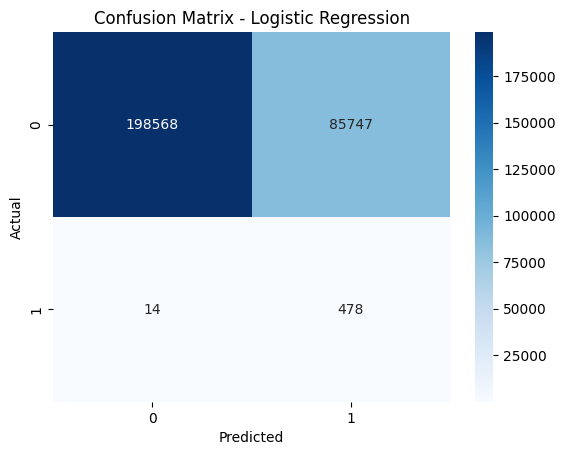

Recall: 0.972
Precision: 0.006
F1 Score: 0.011
Accuracy: 0.699


################################################################

🔹 SECOND MODEL (Random Forest) ANALYSIS
Confusion Matrix (on suspicious cases):


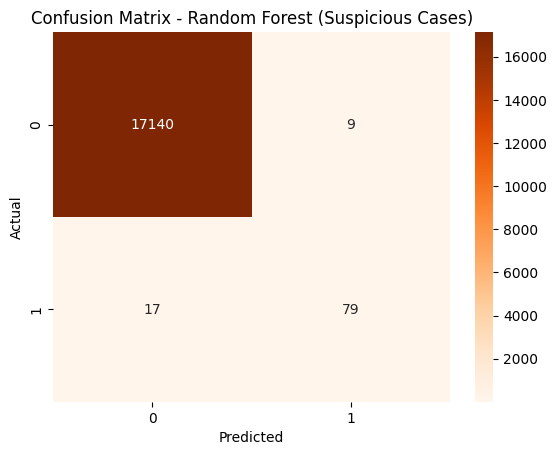

Recall: 0.823
Precision: 0.898
F1 Score: 0.859
Accuracy: 0.998


################################################################



C:\Users\DELL\AppData\Local\Temp\ipykernel_10388\2488557145.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stages, y=precision_vals, palette=colors)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10388\2488557145.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stages, y=recall_vals, palette=colors)


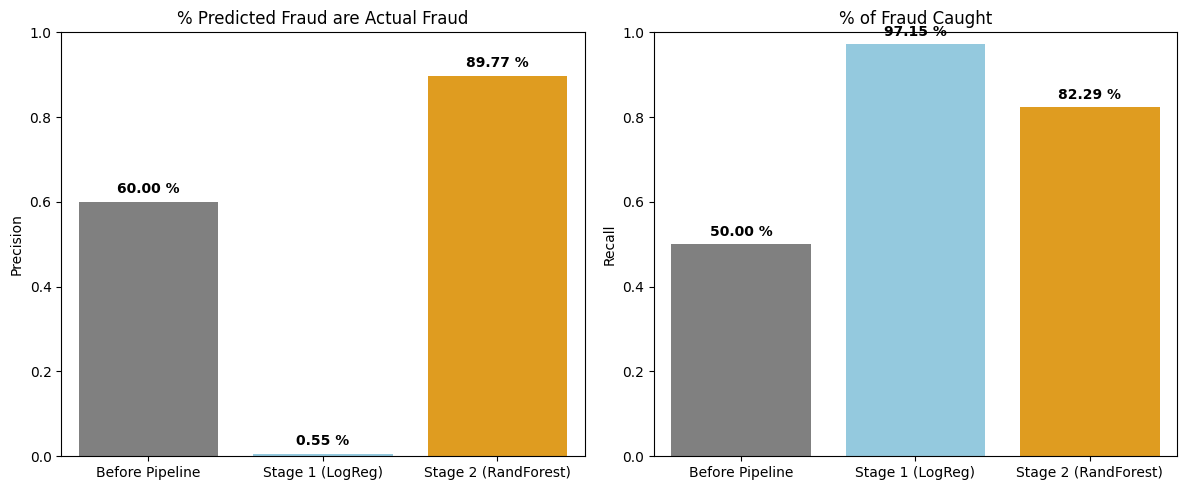

In [32]:
results = pipeline(threshold=0.95)
analyze_pipeline_results(
    y_true_all = get_all_data()[1],
    y_pred_all = results["full_predictions"],
    y_true_suspicious = results["suspicious_true_labels"],
    y_pred_suspicious = results["suspicious_predicted_labels"]
)


Great, so these are actually really good results! We build a safety net to identify suspicious cases that possibly were fraud in the first stage, and on the second one we identified accurately between actual fraud vs suspicious transactions. This resulted in near-zero false positives (to prevent upset clients for extra validations) while spotting 80% of fraud transactions. 

What's left? Well, clean the code to make a .py file to then build the API. 

First, our pipeline function does work, and it returns what it should. 
Then, we have got our pipeline_metrics function, which instead of plotting directly, it would be useful to make it so that it returns those plots in a format that streamlit can work with. 
Finally, our analyze_pipeline_results should return a lot of things. First, Recall, Precision, F1-Score, and Accuracy for both stages and confusion matrix for both stages. It would be useful to make the return a dictionary with metrics and the plots (again, in a format that sreamlit can work with). 